In [7]:
# Basic libraries
import numpy as np
import tensorflow as tf
# LSTM-autoencoder
from LSTMAE.LSTMAutoencoder import *
import matplotlib.pyplot as plt

In [8]:
# Constants
batch_num = 256
hidden_num = 100
step_num = 8
elem_num = 1
iteration = 5000
iteration2 = 300000

In [9]:
tf.reset_default_graph()
tf.set_random_seed(2016)
np.random.seed(2016)


In [10]:
# placeholder list
p_input = tf.placeholder(tf.float32, shape=(batch_num, step_num, elem_num))
p_inputs = [tf.squeeze(t, [1]) for t in tf.split(p_input, step_num, 1)]
Y = tf.placeholder(tf.float32, shape=[None,1])

cell = tf.nn.rnn_cell.LSTMCell(hidden_num, use_peepholes=True)
ae = LSTMAutoencoder(hidden_num, p_inputs, cell=cell, decode_without_input=True)
cls_input = ae.enc_state.h
Y_p_1 = tf.layers.dense(inputs=cls_input,units=200,name='Alper',activation=tf.nn.tanh)
Y_p_2 = tf.layers.dense(inputs=Y_p_1,units=1,name='Alper2')

cls_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=Y_p_2))
alper_list = [v for v in tf.trainable_variables() if 'Alper' in v.name]
optimizer = tf.train.AdamOptimizer().minimize(cls_loss,var_list=alper_list)
sess= tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
for i in range(iteration):
    #step_num = np.random.random_integers(6,12)
    random_sequences = np.random.binomial(n=1,p=0.5,size=[batch_num,step_num,elem_num])
    (loss_val, _) = sess.run([ae.loss, ae.train], {p_input: random_sequences})
    if ((i+1) % 100) is 0:
        print('iter %d:' % (i + 1), loss_val)

iter 100: 0.20502183
iter 200: 0.19614291
iter 300: 0.18588945
iter 400: 0.18582594
iter 500: 0.17530802
iter 600: 0.17162135
iter 700: 0.16922295
iter 800: 0.16456588
iter 900: 0.15524495
iter 1000: 0.14811824
iter 1100: 0.13740054
iter 1200: 0.1291344
iter 1300: 0.12975177
iter 1400: 0.115569726
iter 1500: 0.103902325
iter 1600: 0.09820415
iter 1700: 0.09137993
iter 1800: 0.08701105
iter 1900: 0.07314836
iter 2000: 0.072575465
iter 2100: 0.06642296
iter 2200: 0.057688203
iter 2300: 0.05387033
iter 2400: 0.05169112
iter 2500: 0.04764965
iter 2600: 0.05099482
iter 2700: 0.039609328
iter 2800: 0.031041302
iter 2900: 0.0260556
iter 3000: 0.020248348
iter 3100: 0.0157277
iter 3200: 0.011845491
iter 3300: 0.010511611
iter 3400: 0.007405313
iter 3500: 0.0058723968
iter 3600: 0.004830499
iter 3700: 0.00472923
iter 3800: 0.0034150898
iter 3900: 0.0041961516
iter 4000: 0.003575982
iter 4100: 0.0036364356
iter 4200: 0.0018872224
iter 4300: 0.0023647076
iter 4400: 0.0019215611
iter 4500: 0.00277

In [12]:
loss_array = np.zeros(iteration2)
for i in range(iteration2):
    random_sequences = np.random.binomial(n=1,p=0.5,size=[batch_num,step_num,elem_num])
    sums = np.sum(random_sequences, axis=1)
    labels = np.mod(sums, 2)
    (loss_val, _) = sess.run([cls_loss,optimizer], {p_input: random_sequences,Y:labels})
    loss_array[i] = loss_val
    if ((i+1) % 1000) is 0:
        print('iter %d:' % (i + 1), loss_val)
    if loss_val < 0.001:
        loss_array = loss_array[0:i+1]
        break

iter 1000: 0.69866264
iter 2000: 0.6932073
iter 3000: 0.7030131
iter 4000: 0.69269204
iter 5000: 0.6931844
iter 6000: 0.70008564
iter 7000: 0.69199693
iter 8000: 0.6931318
iter 9000: 0.6929697
iter 10000: 0.6936811
iter 11000: 0.6926476
iter 12000: 0.6923189
iter 13000: 0.6902466
iter 14000: 0.6939428
iter 15000: 0.6925447
iter 16000: 0.6926018
iter 17000: 0.69463253
iter 18000: 0.69194674
iter 19000: 0.6942706
iter 20000: 0.6928122
iter 21000: 0.6930399
iter 22000: 0.69308066
iter 23000: 0.6955226
iter 24000: 0.69429463
iter 25000: 0.7013214
iter 26000: 0.6932162
iter 27000: 0.6932399
iter 28000: 0.69080305
iter 29000: 0.69071466
iter 30000: 0.694453
iter 31000: 0.691759
iter 32000: 0.6838395
iter 33000: 0.67709404
iter 34000: 0.65618414
iter 35000: 0.6194723
iter 36000: 0.4915555
iter 37000: 0.4244287
iter 38000: 0.36441755
iter 39000: 0.28076997
iter 40000: 0.16628435
iter 41000: 0.12876426
iter 42000: 0.09051153
iter 43000: 0.07796441
iter 44000: 0.041928474
iter 45000: 0.020580772

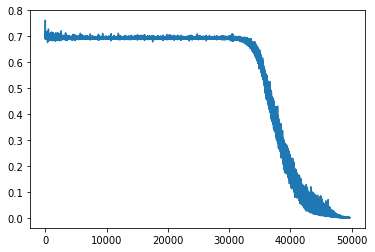

In [13]:
plt.plot(loss_array)
plt.show()